In [64]:
import math

In [65]:
import numpy as np

In [66]:
import matplotlib.pyplot as plt

In [67]:
def unif_sum_samples(n):
    samples = []
    for i in range(n):
        unif_samples = np.random.uniform(0, 1, 12)
        samples.append(np.sum(unif_samples) - 6)
    return samples

In [68]:
my_unif_sum_samples = unif_sum_samples(100000)

In [69]:
unif_sum = np.random.normal(0, 1, 100000)

(array([2.000e+00, 4.000e+00, 3.000e+00, 6.000e+00, 1.300e+01, 2.600e+01,
        4.800e+01, 8.700e+01, 9.600e+01, 1.870e+02, 3.640e+02, 4.360e+02,
        6.110e+02, 9.040e+02, 1.226e+03, 1.637e+03, 2.011e+03, 2.676e+03,
        3.219e+03, 3.661e+03, 4.377e+03, 4.829e+03, 5.401e+03, 5.705e+03,
        6.047e+03, 6.291e+03, 6.080e+03, 6.111e+03, 5.768e+03, 5.466e+03,
        4.912e+03, 4.325e+03, 3.820e+03, 3.151e+03, 2.583e+03, 2.105e+03,
        1.580e+03, 1.271e+03, 1.010e+03, 6.610e+02, 4.750e+02, 3.090e+02,
        1.960e+02, 1.390e+02, 7.000e+01, 4.800e+01, 2.400e+01, 1.500e+01,
        1.000e+01, 4.000e+00]),
 array([-4.12931712, -3.97075765, -3.81219818, -3.65363871, -3.49507924,
        -3.33651977, -3.1779603 , -3.01940083, -2.86084136, -2.70228189,
        -2.54372242, -2.38516295, -2.22660348, -2.06804401, -1.90948454,
        -1.75092507, -1.5923656 , -1.43380613, -1.27524666, -1.11668719,
        -0.95812772, -0.79956825, -0.64100878, -0.48244931, -0.32388984,
        -0.

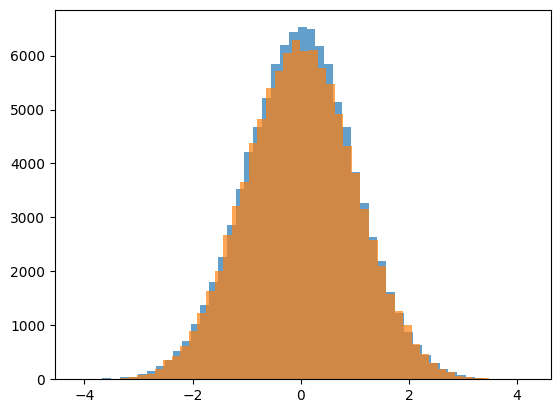

In [70]:
plt.hist(unif_sum, bins = 50, alpha = 0.7)
plt.hist(my_unif_sum_samples, bins = 50, alpha = 0.7)

In [71]:
from scipy.stats import norm

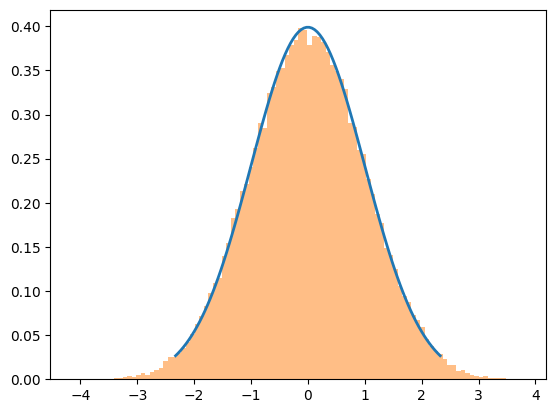

In [72]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), lw=2)
ax.hist(my_unif_sum_samples, bins=100, alpha=0.5, density = True)
plt.show()

In [73]:
def exp_samples(n, l):
    samples = []
    for i in range(n):
        unif = np.random.uniform(0, 1)
        samples.append(-math.log(unif)/l)
    return samples

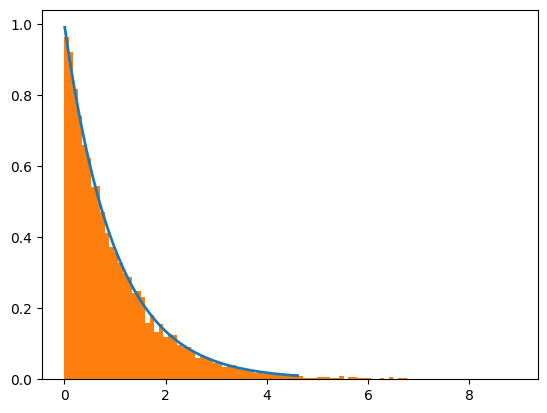

In [74]:
from scipy.stats import expon
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x), lw=2)
ax.hist(exp_samples(10000, 1), density = True, bins = 100)
plt.show()

In [75]:
def weibull(n, beta, alpha = 1):
    unifs = np.random.uniform(0, 1, n)
    weibs = alpha*(-np.log(unifs))**(1/beta)
    return list(weibs)

In [76]:
beta = 10

In [77]:
my_weibs = weibull(10000, beta)

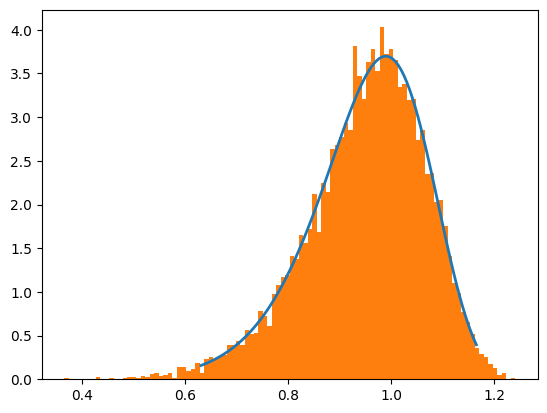

In [78]:
from scipy.stats import weibull_min
fig, ax = plt.subplots(1, 1)
x = np.linspace(weibull_min.ppf(0.01, beta), weibull_min.ppf(0.99, beta), 100)
ax.plot(x, weibull_min.pdf(x, beta), lw=2)
ax.hist(my_weibs, density = True, bins = 100)
plt.show()

In [79]:
def circle_samples(n, power=1):
    r_unifs = np.random.uniform(0, 1, n)
    theta_unifs = np.random.uniform(-np.pi, np.pi, n)
    samples_x = (r_unifs**power)*np.cos(theta_unifs)
    samples_y = (r_unifs**power)*np.sin(theta_unifs)
    return samples_x, samples_y

In [80]:
x_1, x_2 = circle_samples(10000, 0.5)

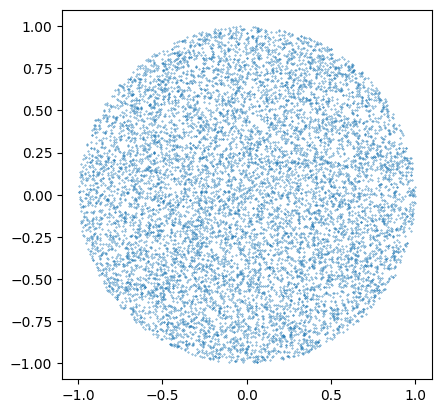

In [81]:
plt.scatter(x_1, x_2, s = 0.1)
plt.gca().set_aspect('equal')

In [82]:
def M_sampler(alpha, lam):
    return ((alpha - 1)/(1 - lam))**(alpha - 1) * np.exp(1 - alpha) / (lam * np.math.factorial(alpha - 1))

In [83]:
def gamma_density(x, alpha):
    return x**(alpha - 1) * np.exp(-x) / np.math.factorial(alpha - 1)

In [84]:
def exp_density(x, lam):
    return lam * np.exp(-lam * x)

In [85]:
alpha = 2

In [86]:
def gamma_rej_sampler(n, alpha, lam):
    samples = np.array([])
    while len(samples) < n:
        x_star = np.random.exponential(1/lam)
        u = np.random.uniform(0, 1)
        if u < gamma_density(x_star, alpha) / (M_sampler(alpha, lam) * exp_density(x_star, lam)):
            samples = np.append(samples, x_star)
    return samples

In [87]:
from scipy.stats import gamma

/var/folders/vg/6675r30x0zd96_fc4pksb0j00000gq/T/ipykernel_42165/630104706.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return x**(alpha - 1) * np.exp(-x) / np.math.factorial(alpha - 1)


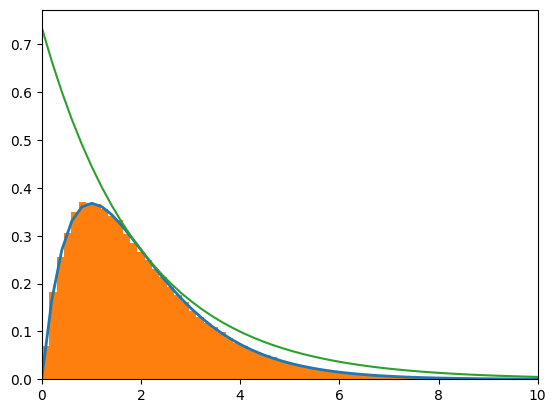

In [88]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 20, 100)
ax.plot(x, gamma_density(x, alpha), lw=2)
ax.hist(gamma_rej_sampler(100000, alpha, 1/alpha), bins = 100, density = True)
ax.plot(x, exp_density(x, 1/alpha) * M_sampler(alpha, 1/alpha))
plt.xlim(0,10)
plt.show()

In [89]:
alpha = 2
beta1 = 9

In [90]:
def beta_sampler(n, alpha, beta):
    x_1 = gamma_rej_sampler(n, alpha, 1/alpha)
    x_2 = gamma_rej_sampler(n, beta, 1/beta)
    return x_1 / (x_1 + x_2)

/var/folders/vg/6675r30x0zd96_fc4pksb0j00000gq/T/ipykernel_42165/630104706.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return x**(alpha - 1) * np.exp(-x) / np.math.factorial(alpha - 1)


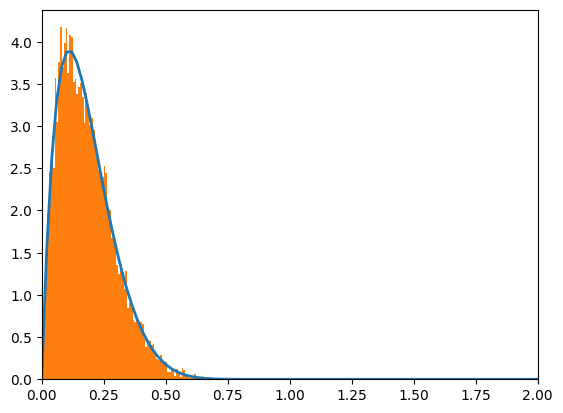

In [91]:
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 2, 100)
ax.plot(x, beta.pdf(x, alpha, beta1), lw=2)
ax.hist(beta_sampler(10000, alpha, beta1), density = True, bins = 100)
ax.set_xlim(0,2)
plt.show()

In [92]:
def M_laplace(alpha):
    return math.sqrt(2 / math.pi) * math.exp(alpha ** 2 / 2) / alpha

In [93]:
def laplace_density(x, alpha):
    return alpha * np.exp(-alpha * abs(x)) / 2

In [94]:
def norm_density(x, mu = 0, sigma = 1):
    return np.exp(-(x - mu)**2 / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma)

In [95]:
def norm_rej_sampler(n, alpha):
    samples = np.array([])
    count = 0
    while len(samples) < n:
        count += 1
        x_star = np.random.laplace(0, 1/alpha)
        u = np.random.uniform(0, 1)
        if u < norm_density(x_star) / (M_laplace(alpha) * laplace_density(x_star, alpha)):
            samples = np.append(samples, x_star)
    return samples, count

In [96]:
alpha2 = 1

In [97]:
accepts = []
for i in range(1, 10000, 10):
    sam, count = norm_rej_sampler(i, alpha2)
    accepts.append(i/count)

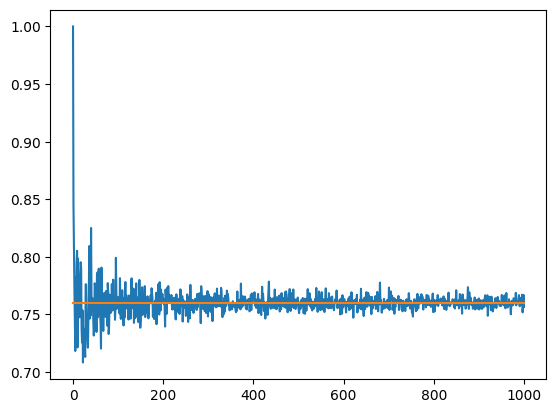

In [98]:
x = np.linspace(0, len(accepts), len(accepts))
plt.plot(x, accepts)
plt.plot(x, math.sqrt(math.pi / (2 * math.exp(1))) * np.ones(len(x)) )

In [99]:
accepts[-1] - math.sqrt(math.pi / (2 * math.exp(1)))

-0.0036806815469967447

In [100]:
M_normal = 1

In [101]:
def trunc_rej_sampler(a, n, mu = 0, sigma = 1):
    samples = np.array([])
    count = 0
    while len(samples) < n:
        count += 1
        x_star = np.random.normal(mu, sigma)
        if -a <= (x_star-mu)/sigma <= a:
            samples = np.append(samples, x_star)
    return samples, count

(array([0.48626354, 0.51251427, 0.52376459, 0.55376542, 0.51376431,
        0.54564019, 0.55376542, 0.54251511, 0.538765  , 0.53126479,
        0.54814026, 0.58439127, 0.57251594, 0.57376598, 0.58501629,
        0.57689107, 0.61564214, 0.63001754, 0.65189315, 0.60376681,
        0.60251678, 0.62751748, 0.62251734, 0.65564326, 0.65564326,
        0.68501908, 0.66751859, 0.61814221, 0.64751803, 0.66314347,
        0.66939364, 0.67064368, 0.63939281, 0.67564382, 0.7037696 ,
        0.68689413, 0.64251789, 0.66814361, 0.68439406, 0.66564354,
        0.6606434 , 0.6893942 , 0.70189455, 0.66626855, 0.67626883,
        0.66189343, 0.65876835, 0.70876974, 0.69251929, 0.72314514,
        0.67814388, 0.68564409, 0.68189399, 0.67064368, 0.66814361,
        0.66376848, 0.69251929, 0.67564382, 0.65501824, 0.66314347,
        0.68126897, 0.69126925, 0.69501935, 0.68314402, 0.65626828,
        0.67126869, 0.65251817, 0.65626828, 0.64751803, 0.65626828,
        0.68126897, 0.63939281, 0.65314319, 0.65

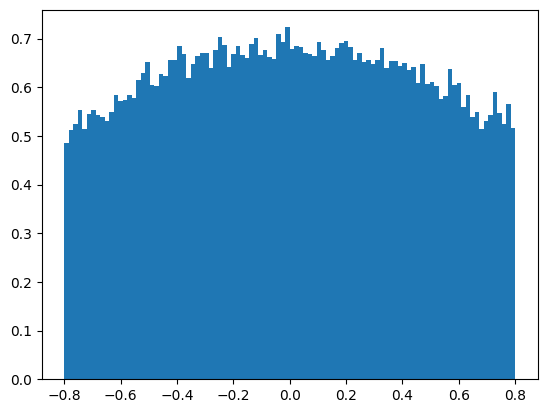

In [102]:
truncs, acceptances = trunc_rej_sampler(0.8, 100000)
fig, ax = plt.subplots(1, 1)
x = np.linspace(-0.8, 0.8, 100)
ax.hist(truncs, density = True, bins = 100)

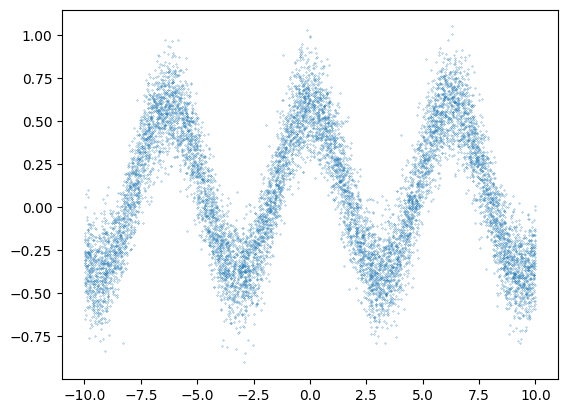

In [103]:
n = 10000
x = np.random.uniform(-10,10,n)
a = 0.5
b = 0.1
sigma_0 = 0.15

y = a*np.cos(x)+b+sigma_0*np.random.normal(0, 1, n)
plt.scatter(x, y, s = 0.05)

In [104]:
n = 100000

w = np.array([0.1, 0.2, 0.3, 0.2, 0.2])
m = np.array([-2, -1, 0, 1, 2])
s = np.array([0.5, 0.1, 0.5, 0.2, 0.5])

def discrete(a, w):
    cw = np.cumsum(w)
    sample = []
    u = np.random.uniform(0, 1)
    for i in range(len(cw)):
        if cw[i] > u:
            sample = a[i]
            break
    return sample

a = np.array([0, 1, 2, 3, 4])
y2 = np.array([])
for i in range(n):
    dist = discrete(a, w)
    sample = np.random.normal(m[dist], s[dist], 1)
    y2 = np.append(y2, sample)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 1.000e+00, 7.000e+00, 7.000e+00, 1.100e+01, 1.700e+01,
        2.700e+01, 4.200e+01, 7.200e+01, 9.700e+01, 1.230e+02, 1.650e+02,
        2.080e+02, 2.280e+02, 3.060e+02, 3.770e+02, 4.130e+02, 5.270e+02,
        5.830e+02, 6.360e+02, 6.820e+02, 6.530e+02, 6.350e+02, 5.860e+02,
        6.170e+02, 5.590e+02, 5.070e+02, 4.260e+02, 3.970e+02, 3.520e+02,
        4.250e+02, 1.430e+03, 3.872e+03, 6.562e+03, 6.044e+03, 3.065e+03,
        1.265e+03, 8.490e+02, 9.180e+02, 1.140e+03, 1.295e+03, 1.520e+03,
        1.661e+03, 1.854e+03, 1.941e+03, 1.950e+03, 1.951e+03, 1.984e+03,
        1.794e+03, 1.706e+03, 1.558e+03, 1.387e+03, 1.402e+03, 1.585e+03,
        1.921e+03, 2.586e+03, 3.165e+03, 3.748e+03, 3.582e+03, 3.143e+03,
        2.363e+03, 1.686e+03, 1.211e+03, 1.059e+03, 9.450e+02, 1.057e+03,
        1.216e+03, 1.209e+03, 1.249e+03, 1.301e+03, 1.329e+03, 1.292e+03,
        1.253e+03, 1.104e+03, 1.019e+0

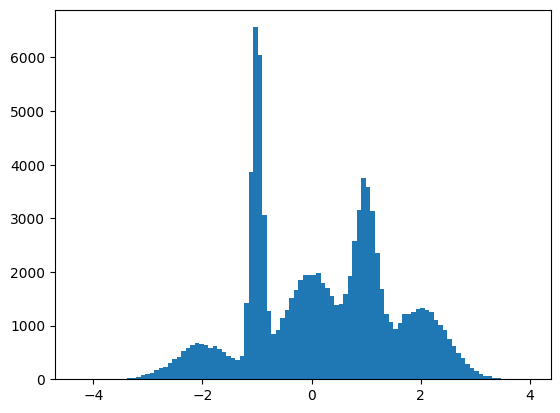

In [105]:
plt.hist(y2, bins = 100)

In [106]:
y3 = np.array([])
for i in range(n):
    dist = discrete(a, w)
    sample = trunc_rej_sampler(0.1, 1, mu = m[dist], sigma = s[dist])
    y3 = np.append(y3, sample[0])

In [107]:
def unif_circle_density(x):
    return 2 / np.pi * np.sqrt(1 - x ** 2)

In [108]:
def circle_sampler(n):
    x1 = np.zeros(n)
    x2 = np.zeros(n)
    for i in range(n):
        while True:
            x1[i] = np.random.uniform(-1, 1)
            x2[i] = np.random.uniform(-1, 1)
            if x1[i]**2 + x2[i]**2 <= 1:
                break
    return x1, x2

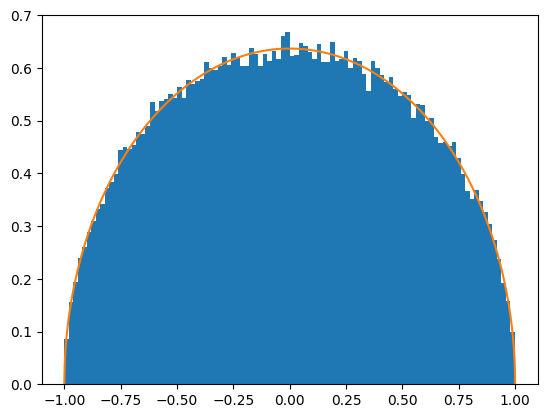

In [109]:
n = 100000
x3 = np.linspace(-1, 1, 1000)
circle_points = []
x1, x2 = circle_sampler(n)
plt.hist(x1, density = True, bins = 100)
plt.plot(x3, unif_circle_density(x3))

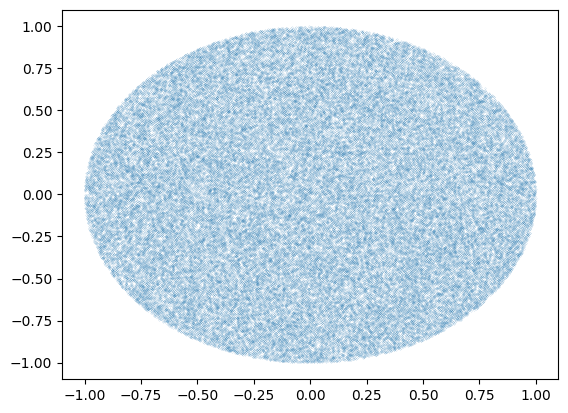

In [110]:
plt.scatter(x1, x2, s=0.005)

/var/folders/vg/6675r30x0zd96_fc4pksb0j00000gq/T/ipykernel_42165/747095122.py:38: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, N_max])


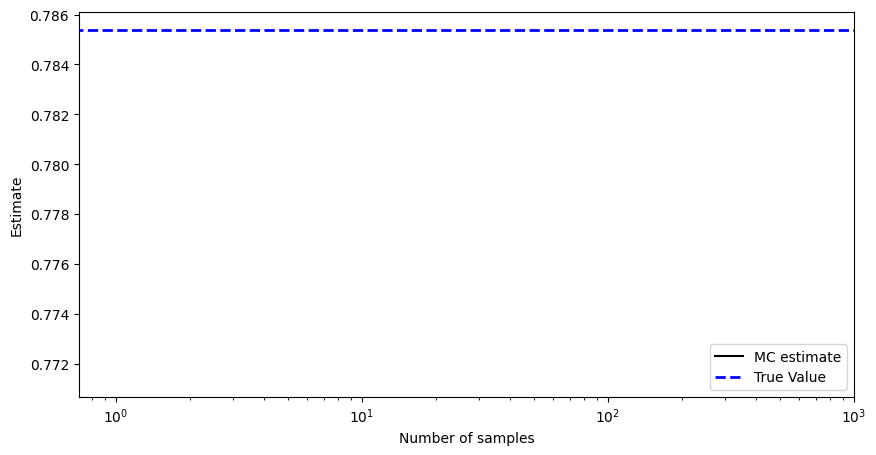

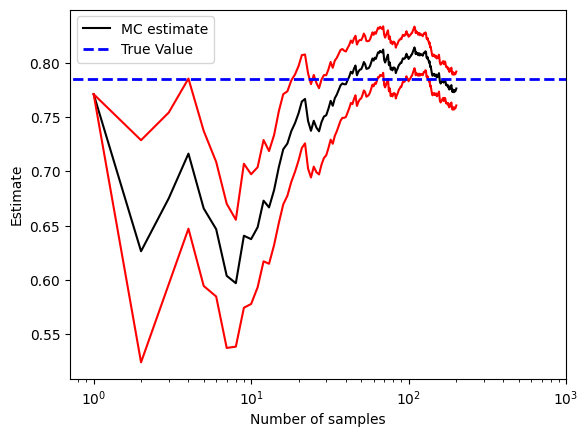

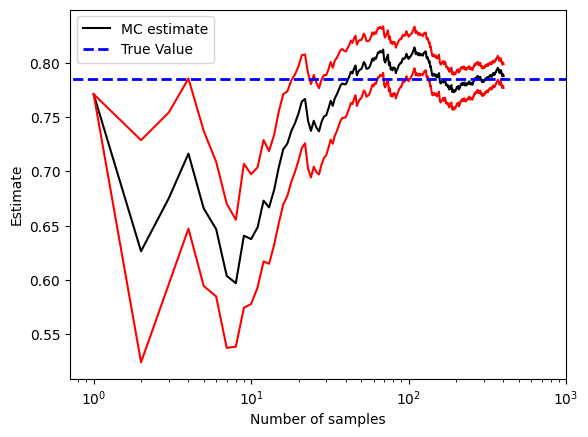

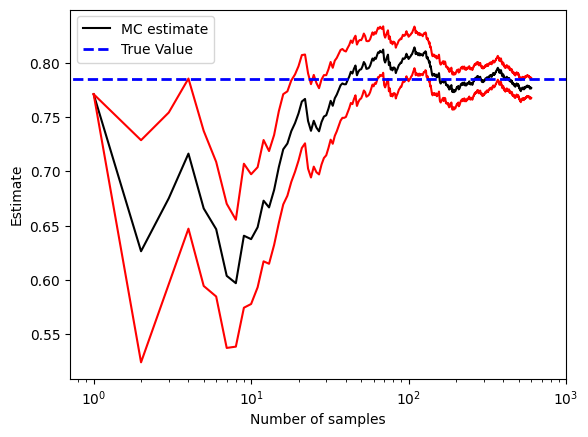

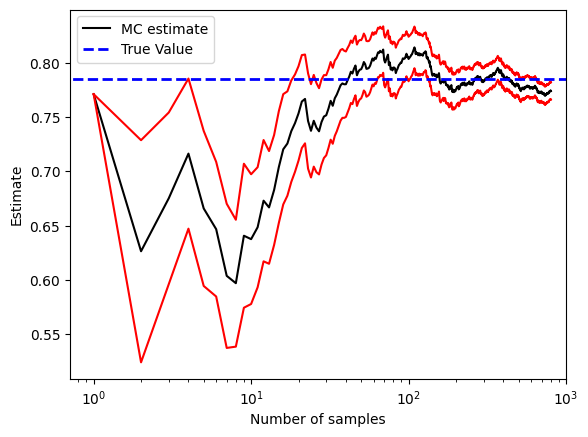

In [111]:
def phi(x):
    return np.sqrt((1 - x**2))

I = np.pi / 4

N_max = 1000

U = np.random.uniform(0, 1, N_max)
I_est = np.zeros(N_max - 1)
I_var = np.zeros(N_max - 1)
I_var_correct = np.zeros(N_max - 1)

fig = plt.figure(figsize=(10 , 5))

K = np.array([])
k = 0

for N in range(1, N_max , 1):
# print(N)

    I_est[k] = (1/N) * np.sum(phi(U[0:N]))
    I_var[k] = (1/(N**2)) * np.sum(( phi(U[0:N]) - I_est[k])**2)

    k = k + 1

    K = np.append(K, N)
    if (N-1) % 200 == 0:
        plt.clf ()
        plt.semilogx(K, I_est[0:k], 'k-', label='MC estimate')
        plt.plot(K, I_est[0:k] + np.sqrt(I_var[0:k]), 'r',
        alpha=1)
        plt.plot(K, I_est[0:k] - np.sqrt(I_var[0:k]), 'r', alpha=1)
        plt.plot([0, N_max], [I, I], 'b--', label='True Value', alpha=
        1, linewidth=2)
        plt.legend()
        plt.xlabel('Number of samples')
        plt.ylabel('Estimate')
        plt.xlim([0, N_max])
        plt.show(block=False)  
        plt.pause(0.01)


In [112]:
def mc_norm(val, n):
    x = 0
    estimate = 0
    for i in range(n):
        x = np.random.normal(0, 1)
        if x > val:
            estimate += 1
    return estimate/n

In [113]:
mc_norm(4, 10000)

0.0

In [114]:
def is_norm(val, n, q_mu = 6, q_sigma = 1):
    estimate = 0
    x = np.random.normal(q_mu, q_sigma, n)
    w = norm_density(x, 0, 1)/norm_density(x, q_mu, q_sigma)
    for i, sample in enumerate(x):
        if sample > val:
            estimate += w[i]
    return estimate/n

In [115]:
is_norm(4, 10000)

3.19474769088765e-05

In [116]:
q_mus = np.arange(0, 10, 0.5)
probs = []
n = 10000
for mu in q_mus:
    probs.append(is_norm(4, n, mu))

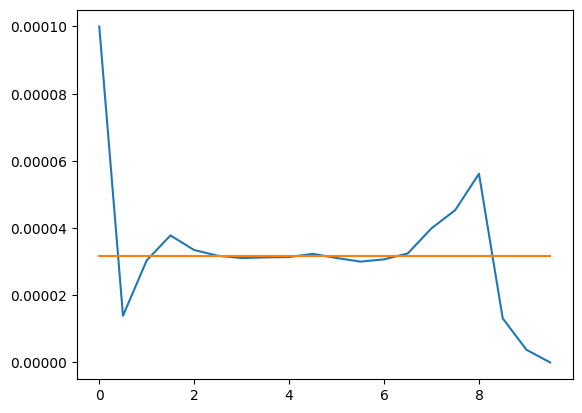

In [117]:
import scipy
plt.plot(q_mus, probs)
plt.plot(q_mus, (1 - scipy.stats.norm.cdf(4))*np.ones(20))

In [118]:
def mc_norm_mean(n):
    x = np.random.normal(0, 1, n)
    return np.sum(x)/n

In [119]:
def is_norm_mean(n):
    x = np.random.normal(0, 2, n)
    w = norm_density(x)/norm_density(x, mu = 0, sigma = 2)
    samples = x*w
    return np.sum(samples)/n

In [120]:
n = 100000
mc_norm_mean(n)

-0.004681682142448686

In [121]:
is_norm_mean(n)

-0.0009503140414734163

In [122]:
def mc_runs(m, n):
    mc_estimate = np.zeros(m)
    is_estimate = np.zeros(m)
    for i in range(m):
        mc_estimate[i] = mc_norm_mean(n)
        is_estimate[i] = is_norm_mean(n)
    return mc_estimate, is_estimate

In [123]:
n = 10000
m = 10000

In [124]:
mc_samples, is_samples = mc_runs(m, n)
np.std(mc_samples), np.std(is_samples)

(0.010048654467370252, 0.009311356191373955)

In [143]:
def norm_cond(x, y = 9, sigma = 1):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(y-x)**2/(2*sigma**2))

Ns = np.logspace(1, 6, 6)
true_p = norm_density(9, sigma = np.sqrt(2))
mc_estimates = []
for length in Ns:
    xs = np.random.normal(0, 1, int(length))
    phi_vals = norm_cond(xs)
    mc_estimates.append(np.sum(phi_vals)/length)
    

In [144]:
raes_mc = np.abs(mc_estimates - true_p)

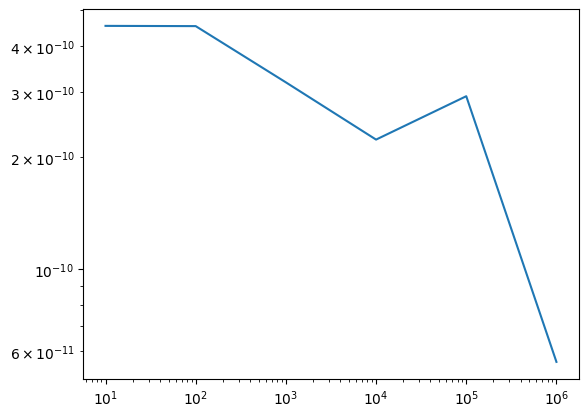

In [145]:
plt.loglog(Ns, raes_mc)

In [146]:
def cond_is_norm(n, mu = 9/2, sigma = np.sqrt(1/2)):
    x_vals = np.random.normal(mu, np.sqrt(sigma), n)
    w_is = norm_density(x_vals, 0, 1)/norm_density(x_vals, mu, np.sqrt(sigma))
    phi_i = norm_density(9, x_vals, 1)
    return np.dot(w_is, phi_i)/n

In [147]:
is_norm_conds = []
for i in Ns:
    is_norm_conds.append(cond_is_norm(int(i)))

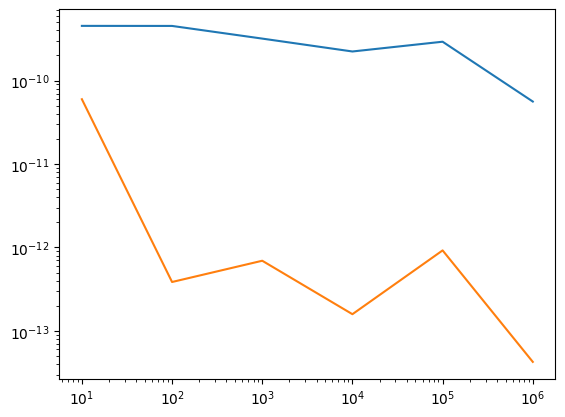

In [148]:
raes_is = np.abs(is_norm_conds - true_p)
plt.loglog(Ns, raes_mc)
plt.loglog(Ns, raes_is)

In [149]:
logW = [1000, 1001, 999, 1002, 950]
w1 = np.exp(logW)/np.sum(np.exp(logW))
w2 = np.exp(logW-np.max(logW))/np.sum(np.exp(logW-np.max(logW)))

/var/folders/vg/6675r30x0zd96_fc4pksb0j00000gq/T/ipykernel_42165/3388233184.py:2: RuntimeWarning: overflow encountered in exp
  w1 = np.exp(logW)/np.sum(np.exp(logW))
/var/folders/vg/6675r30x0zd96_fc4pksb0j00000gq/T/ipykernel_42165/3388233184.py:2: RuntimeWarning: invalid value encountered in divide
  w1 = np.exp(logW)/np.sum(np.exp(logW))


In [150]:
w1, w2

(array([nan, nan, nan, nan, nan]),
 array([8.71443187e-02, 2.36882818e-01, 3.20586033e-02, 6.43914260e-01,
        1.68079592e-23]))

In [25]:
import numpy as np
rng = np.random.default_rng(25)
values = 0
M = 1000
x = rng.normal(0, 1, M)
y = rng.normal(x, 1)
mu_true = np.sum(y_ests)/(M+1)

In [26]:
mu_true

0.05643745092592988

In [27]:
def logp(x):
    return -x**2/2 - np.log(np.sqrt(2*np.pi))

def loglik(x, y):
    return -(x-y)**2/2 - np.log(np.sqrt(2*np.pi))

def logq(x):
    return -x**2/2 - np.log(np.sqrt(2*np.pi))

def ESS(w):
    return 1/np.sum(w**2)

In [28]:
N = 10000
x = rng.normal(0, 1, N)
logW = np.zeros(N)

In [31]:
for i in range(N):
    logW[i] = np.sum(loglik(x[i], y)) + logp(x[i]) - logq(x[i])

log_hat_W = logW - np.max(logW)

w = np.exp(log_hat_W)/np.sum(np.exp(log_hat_W))
w2 = np.exp(logW)/np.sum(np.exp(logW))

np.sum(w*x), np.sum(w2*x)

/var/folders/vg/6675r30x0zd96_fc4pksb0j00000gq/T/ipykernel_99487/592921681.py:7: RuntimeWarning: invalid value encountered in divide
  w2 = np.exp(logW)/np.sum(np.exp(logW))


(0.05801514547433188, nan)

In [32]:
ESS(w), ESS(w2)

(447.66525887264424, nan)

<function matplotlib.pyplot.show(close=None, block=None)>

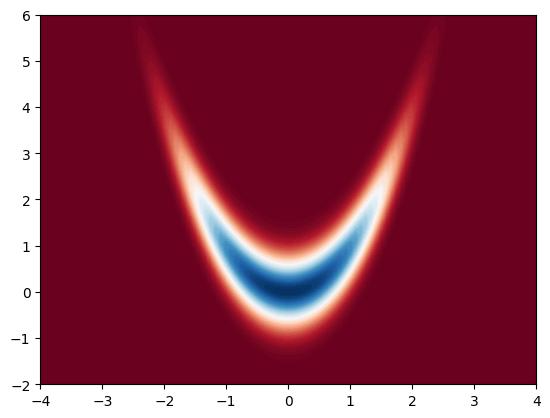

In [34]:
import matplotlib.pyplot as plt
def bar_p(x):
    return np.exp(-x[0]**2/10 - x[1]**2/10 - 2*(x[1] - x[0]**2)**2)

x_bb = np.linspace(-4, 4, 100)
y_bb = np.linspace(-2, 6, 100)
X_bb, Y_bb = np.meshgrid(x_bb, y_bb)

Z_bb = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        Z_bb[i, j] = bar_p([X_bb[i, j], Y_bb[i, j]])

plt.contourf(X_bb, Y_bb, Z_bb, 100, cmap='RdBu')
plt.show

In [35]:
def logbar_p(x):
    return -x[0]**2/10 - -x[1]**2/10-2*(x[1]-x[0]**2)**2

def loglik_b(x, y, sigma = 0.05):
    H = [1, 0]
    return -(y - H@x) ** 2 / (2 * sigma ** 2) - np.log(sigma * np.sqrt(2 * np.pi))

def logq_b(x):
    return -x[0]**2/2 - x[1]**2/2 - np.log(2 * np.pi)

def ESS(w):
    return 1/np.sum(w**2)

In [40]:
N = 10000
x = rng.normal(0, 1, (2, N))
logW = np.zeros(N)

In [42]:
for i in range(N):
    logW[i] = np.sum(loglik_b(x[:, i], y)) + logbar_p(x[:, i]) - logq_b(x[:, i])
log_hat_Wb = logW - np.max(logW)
w = np.exp(log_hat_Wb)/np.sum(np.exp(log_hat_Wb))
mean = np.sum(w*x, axis = 1)

In [43]:
ESS(w)

12.157659933249757

In [44]:
x_resampled = np.zeros((2, N))
for i in range(N):
    x_resampled[:, i] = x[:, rng.choice(N, p=w)]

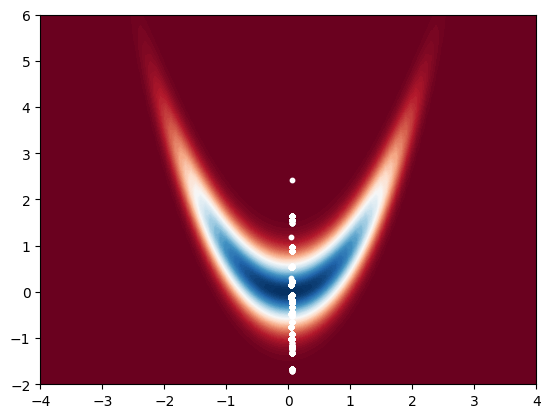

In [46]:
x_bb = np.linspace(-4, 4, 100)
y_bb = np.linspace(-2, 6, 100)
X_bb, Y_bb = np.meshgrid(x_bb, y_bb)
Z_bb = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        Z_bb[i, j] = bar_p([X_bb[i, j], Y_bb[i, j]])
plt.contourf(X_bb, Y_bb, Z_bb, 100, cmap='RdBu')
plt.scatter(x_resampled[0, :], x_resampled[1, :], s=10, c='white')
plt.show()